#TP2 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre le domaine des fréquences d'une image
* Effectuer un filtrage fréquentiel sur l'image

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.
* Voici un schéma des traitements à effectuer pour vous y retrouver danc ce TP :
![schéma TP](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/annexes/TP2_Intro_TS.png?ref_type=heads)

In [3]:
# OS setup
#!cat /etc/os-release
#!sudo apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

fatal: destination path 'tp-m1-ts' already exists and is not an empty directory.


In [4]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

##Domaine spectral d'une image

Vous allez travailler sur un extrait de l'image de [Lena](https://en.wikipedia.org/wiki/Lenna) :

![Lena extract](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/lena.jpg?ref_type=heads)

In [6]:
img = plt.imread('tp-m1-ts/tp2/lena.jpg')

In [7]:
img

array([[162, 162, 160, ..., 169, 171, 168],
       [163, 162, 161, ..., 169, 169, 169],
       [163, 161, 160, ..., 174, 174, 168],
       ...,
       [ 49,  54,  48, ...,  88,  96,  96],
       [ 44,  51,  45, ...,  92, 102, 102],
       [ 41,  53,  47, ...,  97, 101, 102]], dtype=uint8)

Il s'agit d'une image en 256 niveaux de gris. Affichez cette image avec cette carte de couleurs.

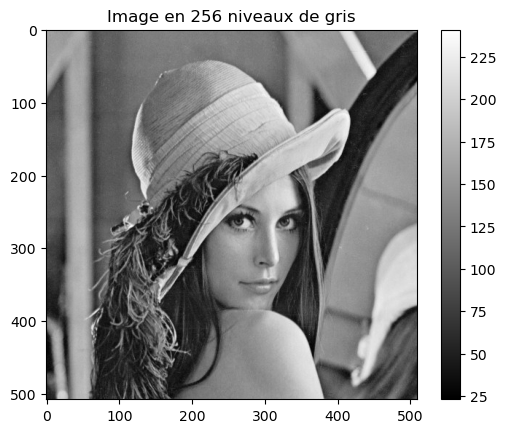

In [8]:
# Afficher l'image
plt.imshow(img, cmap='gray') # Utiliser la carte de couleurs en niveaux de gris
plt.colorbar() # Affiche une barre de couleur pour comprendre l'échelle
plt.title("Image en 256 niveaux de gris")
plt.show()

* Calculer la représentation fréquentielle de l'image, en utilisant la transformée de Fourier discrète bidimensionnelle : [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)

**Attention** : le résultat est une matrice complexe de même dimension que la matrice originale !
Pour visualiser cette matrice de coefficients complexes, il faut calculer le module, puis afficher le résultat sur une échelle d'intensité logarithmique.

In [9]:
fft2 = np.fft.fft2(img, s=None, axes=(-2, -1), norm=None)

In [10]:
fft2

array([[ 3.20801010e+07+1.74622983e-10j, -4.28225509e+05+2.37409369e+06j,
         1.53553769e+06-1.13296642e+06j, ...,
        -1.79879236e+05-6.55431946e+05j,  1.53553769e+06+1.13296642e+06j,
        -4.28225509e+05-2.37409369e+06j],
       [-4.53312037e+03-1.20661668e+06j, -1.52968349e+06+1.62128168e+06j,
        -1.09005269e+06+1.55195911e+05j, ...,
         6.30842725e+05+8.01247390e+05j, -3.34939539e+05+4.32437869e+05j,
         3.87495793e+04+9.39280285e+05j],
       [-4.54234340e+05-1.51222474e+05j, -2.82969008e+05-7.57380580e+04j,
         6.49620202e+05-4.60546349e+05j, ...,
         3.43512562e+05+9.38558889e+05j, -6.93132669e+05-1.89781217e+05j,
         8.16968576e+05-2.38997089e+04j],
       ...,
       [ 4.95925013e+05-2.29295713e+05j,  7.54834082e+05+6.95878991e+05j,
        -5.33911018e+05-1.71590876e+05j, ...,
         9.94650057e+05+1.39134383e+05j,  1.26936995e+05-6.38585752e+05j,
        -7.46153233e+04+5.90901137e+05j],
       [-4.54234340e+05+1.51222474e+05j,  8.

In [15]:
fft_viz = np.abs(fft2)

In [16]:
fft_viz = np.log(fft_viz)

In [18]:
fft_viz

array([[17.28374649, 14.69613474, 14.46170688, ..., 13.42935862,
        14.46170688, 14.69613474],
       [14.00333792, 14.61706813, 13.91177051, ..., 13.83510165,
        13.21216733, 13.75371945],
       [13.07892402, 12.58768737, 13.58774362, ..., 13.81495709,
        13.48512197, 13.61378363],
       ...,
       [13.21104827, 13.84181725, 13.23713196, ..., 13.81983536,
        13.38638733, 13.29731364],
       [13.07892402, 13.61378363, 13.48512197, ..., 13.74874521,
        13.58774362, 12.58768737],
       [14.00333792, 13.75371945, 13.21216733, ..., 14.45905842,
        13.91177051, 14.61706813]])

In [20]:
fft_viz.shape

(508, 509)

# Localisation des hautes et basses fréquences

**Attention** : la représentation Python n'est pas la représentation conventionnelle ! En image on applique un fftshift en général en plus. Ici, Ne réalisez pas cette opération pour la réponses aux question ci-dessous, sinon vous allez inverser les interprétations.

**Méthode** : retirer des zones de fréquences de l'image afin de localiser les hautes et basses fréquences.

Pour ce faire, les coefficients complexes de la représentation fréquentielle (coefficients du spectre), situés dans une zone rectangulaire (ou circulaire), sont remplacés par des 0.

Dans les 2 exemples ci-dessous, 25% des coefficients ont été supprimés.

![25% de suppression des fréquences au milieu](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_1.jpg?ref_type=heads)

![25% de suppression des fréquences à l'extérieur](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/tp3_2.jpg?ref_type=heads)

Pour mesurer l'impact de ce traitement, effectuez la transformée de Fourier inverse (voir [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)) et affichez l'image résultante.

In [101]:
def remove_rectangle(image, proportion, mode):
    """
    Supprime une portion rectangulaire d'une image.

    :param image: Image source sous forme d'un tableau numpy.
    :param proportion: Proportion de la taille du rectangle central par rapport à l'image (0 < proportion < 1).
    :param mode: 'center' pour supprimer le centre, 'periphery' pour supprimer la périphérie.
    :return: Image modifiée.
    """
    # Dimensions de l'image
    height, width = image.shape[:2]

    # Calcul des dimensions du rectangle central
    rect_height, rect_width = int(height * proportion), int(width * proportion)

    # Calcul des coordonnées du rectangle central
    start_y, start_x = (height - rect_height) // 2, (width - rect_width) // 2
    end_y, end_x = start_y + rect_height, start_x + rect_width

    # Suppression ou conservation du rectangle central
    if mode == 'haute':
        # Création d'une copie de l'image pour la modification
        modified_image = np.copy(image)
        modified_image[start_y:end_y, start_x:end_x] = 0
    elif mode == 'basse':
        # Conservation du rectangle central et suppression de la périphérie
        central_rect = image[start_y:end_y, start_x:end_x]
        modified_image = np.zeros_like(image)
        modified_image[start_y:end_y, start_x:end_x] = central_rect

    return modified_image

In [107]:
supp_haute = remove_rectangle(fft_viz, 0.75, mode = 'haute')

In [109]:
def visualiser_spectre(sp):
    """
    Visualise un spectre en niveaux de gris.

    Paramètres
    ----------
    spectre : ndarray
        Le spectre de fréquences à visualiser.
    """
    # Créer une nouvelle figure
    plt.figure()
    # Afficher l'image
    plt.imshow(sp, cmap='gray')  # Utiliser la carte de couleurs en niveaux de gris
    plt.colorbar()  # Affiche une barre de couleur pour comprendre l'échelle
    plt.title("Spectre en niveaux de gris")
    plt.show()  # Affiche la figure actuelle

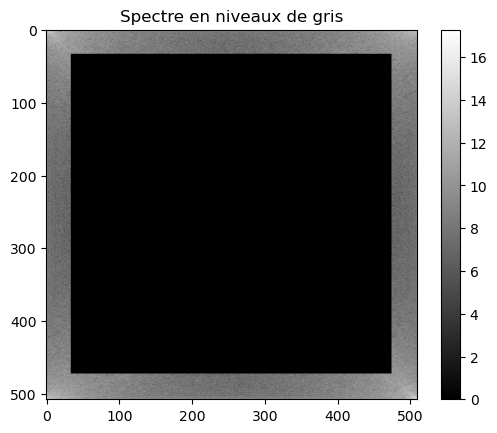

In [110]:
visualiser_spectre(supp_haute)

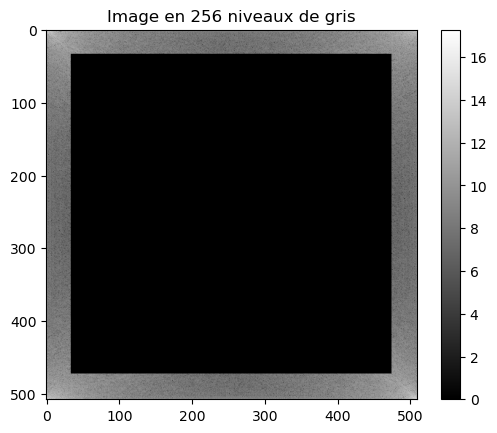

In [111]:
# Afficher l'image
plt.imshow(supp_haute, cmap='gray') # Utiliser la carte de couleurs en niveaux de gris
plt.colorbar() # Affiche une barre de couleur pour comprendre l'échelle
plt.title("Image en 256 niveaux de gris")
plt.show()

* Où se situent les hautes et les basses fréquences ?

votre réponse...

* A partir de quel pourcentage de coefficients complexes supprimés aux basses fréquences l'image n'est-elle plus reconnaissable ?

In [ ]:
# à vous...

votre réponse...

* Suggérer une configuration qui ne conserve que les contours de l'image.

In [ ]:
# à vous...

# Réduction du bruit de l'image

Nous allons essayer de débruiter l'image ci-dessous (cela correspond à un bruit poivre et sel correspondant à 5% des pixels) (située ici : tp-m1-ts/tp2/img_b.jpg)

![Lena bruitée](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp2/img_b.jpg?ref_type=heads)

* Réduisez ce bruit à l'aide du spectre de Fourier.


In [ ]:
# à vous...

* Comparez ce filtrage avec l'application d'un filtre médian 3x3 à l'image bruitée. Pour simplifier votre algorithme, vous pouvez utiliser les commandes [numpy.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) et [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html).

In [ ]:
# à vous...

Vos commentaires...